# TASK 3 Fraud Detection System.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Data Preprocessing

In [9]:
df = pd.read_csv("creditcards.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [8]:
df['Class'].value_counts()

Class
0.0    99776
1.0      492
Name: count, dtype: int64

In [12]:
X = df.drop('Class', axis=1)
y = df['Class']

In [47]:
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [22]:
df = df.dropna()

In [ ]:

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
# Handle imbalance using SMOTE
over = SMOTE(sampling_strategy=0.1)
X_train_res, y_train_res = over.fit_resample(X_train, y_train)

In [24]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_res).value_counts())

Before SMOTE: Class
0.0    79820
1.0      394
Name: count, dtype: int64
After SMOTE: Class
0.0    79820
1.0     7982
Name: count, dtype: int64


# Model Training

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[19949     7]
 [    4    94]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19956
         1.0       0.93      0.96      0.94        98

    accuracy                           1.00     20054
   macro avg       0.97      0.98      0.97     20054
weighted avg       1.00      1.00      1.00     20054


Accuracy Score: 0.9994514810012965


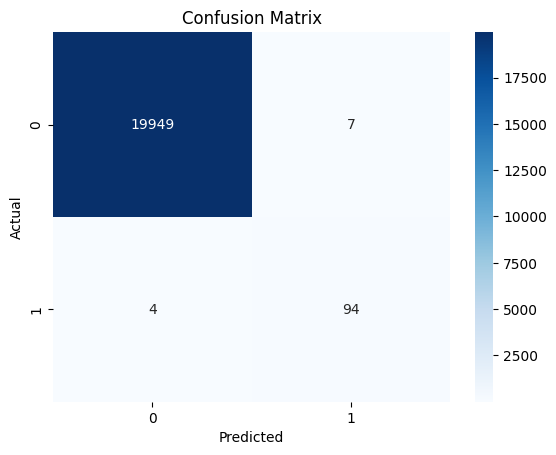

In [28]:
#Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Command-Line Testing Interface

In [30]:
def test_transaction(model):
    print("Enter 30 features of the transaction (separated by commas):")
    input_data = input().strip().split(",")
    if len(input_data) != 30:
        print("Error: You must enter exactly 30 feature values.")
        return
    try:
        input_array = np.array([float(x) for x in input_data]).reshape(1, -1)
        prediction = model.predict(input_array)[0]
        result = "Fraudulent" if prediction == 1 else "Legitimate"
        print("Prediction:", result)
    except ValueError:
        print("Invalid input. Please enter only numeric values.")

In [ ]:
# Fraud Sample
fraud_sample = X_test[y_test == 1].iloc[0]
fraud_input = ','.join(map(str, fraud_sample.values))
print("Fraud Sample:", fraud_input)
print("COPY THE STRING AND PASTE IT IN CLI")

Fraud Sample: 133184.0,-1.212681701,-2.48482353,-6.397185815,3.670562448,-0.863375061,-1.855854731,1.01773158,-0.544703775,-1.70337805,-3.739659479,1.738124014,-2.844449336,0.765863961,-4.799737135,-0.011335412,-2.693168082,-3.166955158,-1.06780012,-0.559132202,2.908373946,1.396872063,0.092072872,-1.492882499,-0.204227396,0.532510949,-0.293871104,0.21266306,0.431094708,1335.0
COPY THE STRING AND PASTE IT IN CLI


In [50]:
# Legit Sample
legit_sample = X_test[y_test == 0].iloc[0]
legit_input = ','.join(map(str, legit_sample.values))
print("Legit Sample:", legit_input)
print("COPY THE STRING AND PASTE IT IN CLI")

Legit Sample: 37616.0,-1.056938805,0.38687909,2.474964272,0.905467111,0.888288649,1.412437809,0.046901118,0.526970531,0.054934803,-0.302303689,0.512127171,0.365873594,-0.60952024,-0.181133203,1.308125162,-1.993296025,1.439213446,-2.330425103,-0.749014274,0.164329725,-0.218785109,-0.175567623,0.032137101,-0.669913372,-0.121354997,-0.407598296,0.243293565,-0.079603971,0.64
COPY THE STRING AND PASTE IT IN CLI


In [ ]:
# Fraud test
test_transaction(model)


Enter 30 features of the transaction (separated by commas):
Prediction: Fraudulent


C:\Users\Haseeb\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Legitimate test
test_transaction(model)

Enter 30 features of the transaction (separated by commas):
Prediction: Legitimate


C:\Users\Haseeb\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
